In [1]:
import json
import os
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
user_set = set()
with open('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/users.json', 'r') as file_open:
    loaded = json.loads(file_open.read())
    user_set.update(loaded[0].keys())

In [3]:
user_set

{'color',
 'deleted',
 'id',
 'is_admin',
 'is_app_user',
 'is_bot',
 'is_owner',
 'is_primary_owner',
 'is_restricted',
 'is_ultra_restricted',
 'name',
 'profile',
 'real_name',
 'team_id',
 'tz',
 'tz_label',
 'tz_offset',
 'updated'}

In [4]:
channels_set = set()
with open('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json', 'r') as file_open:
    loaded = json.loads(file_open.read())
    channels_set.update(loaded[0].keys())

In [5]:
channels_set

{'created',
 'creator',
 'id',
 'is_archived',
 'is_general',
 'members',
 'name',
 'pins',
 'purpose',
 'topic'}

## Memebership graph

In [6]:
# members and channels in one bag
def static_graph_builder(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        for i in loaded:
            G.add_node(i['name'], role='room')
            G.add_nodes_from(i['members'], role='users')
            for j in i['members']:
                G.add_edge(i['name'], j)
    return G

In [7]:
G = static_graph_builder('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [8]:
G.number_of_nodes()

54639

In [9]:
G.number_of_edges()

1062962

In [10]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 54639\nNumber of edges: 1062962\nAverage degree:  38.9085'

In [11]:
if nx.is_connected(G):
    print('Граф является ненаправленным и связным.')
else:
    print('Граф является ненаправленным и состоит из нескольких компонент.')

Граф является ненаправленным и состоит из нескольких компонент.


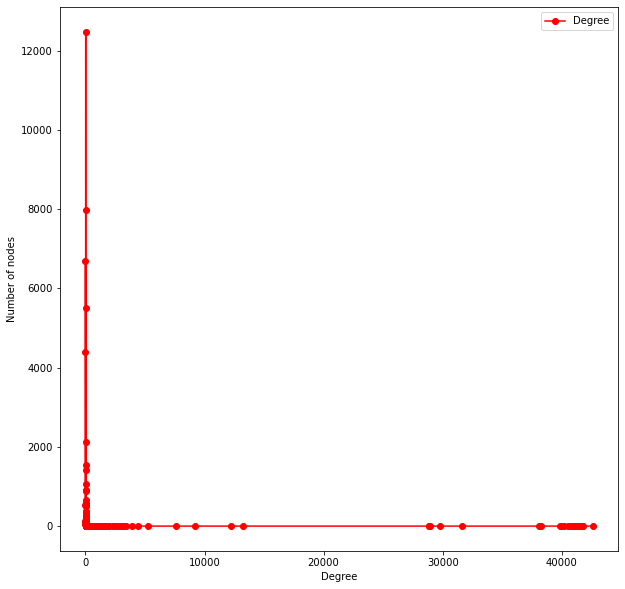

In [12]:
degree = dict(G.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 10))
plt.plot(degree_values, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

In [21]:
# user to user graph, where channels are edges
def static_graph_builder_user_to_user(path_):
    G = nx.MultiGraph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        for i in loaded:
            G.add_nodes_from(i['members'])
            for j in i['members']:
                for k in i['members']:
                    if j != k:
                        G.add_edge(j, k)
    return G

In [ ]:
G_us = static_graph_builder_user_to_user('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [ ]:
nx.info(G_us)

In [13]:
# channel to channel graph, where common users are edges
def static_graph_builder_channel_to_channel(path_):
    G = nx.MultiGraph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())        
        for i in loaded:
            G.add_node(i['name'])
            for j in loaded:
                G.add_node(j['name'])
                if i != j:
                    s = set(i['members'])
                    s.update(set(j['members']))
                    for k in s:
                        G.add_edge(i['name'], j['name'], k)
    return G

In [ ]:
G_ch = static_graph_builder_channel_to_channel('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [18]:
# channel to channel weighted graph, where common users are edges. With loops
def static_graph_weighted(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())        
        for i in loaded:
            G.add_node(i['name'])
            for j in loaded:
                G.add_node(j['name'])
                if i != j:
                    s = set(i['members'])
                    s.update(set(j['members']))
                    G.add_edge(i['name'], j['name'], weight=len(s))
    return G

In [20]:
G_w = static_graph_weighted('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [21]:
nx.info(G_w)

'Name: \nType: Graph\nNumber of nodes: 366\nNumber of edges: 66795\nAverage degree: 365.0000'

In [13]:
# weighted links between channels
from itertools import combinations

def static_graph_weighted2(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        namelist = [i['name'] for i in loaded]
        G.add_nodes_from(namelist)
        edgeslist = [items for items in combinations(namelist, r=2)]
        for j in edgeslist:
            s = set()
            for i in loaded:
                if i['name'] == j[0] or i['name'] == j[1]:
                    s.update(i['members'])            
            if s:
                G.add_edge(j[0], j[1], weight=len(s))
    return G

In [14]:
# channels by users
def channel_fullness(path_):
    chF = {}
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        chF = {i['name']: len(i['members']) for i in loaded}
    return chF

In [15]:
G_w2 = static_graph_weighted2('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [16]:
nx.info(G_w2)

'Name: \nType: Graph\nNumber of nodes: 366\nNumber of edges: 65805\nAverage degree: 359.5902'

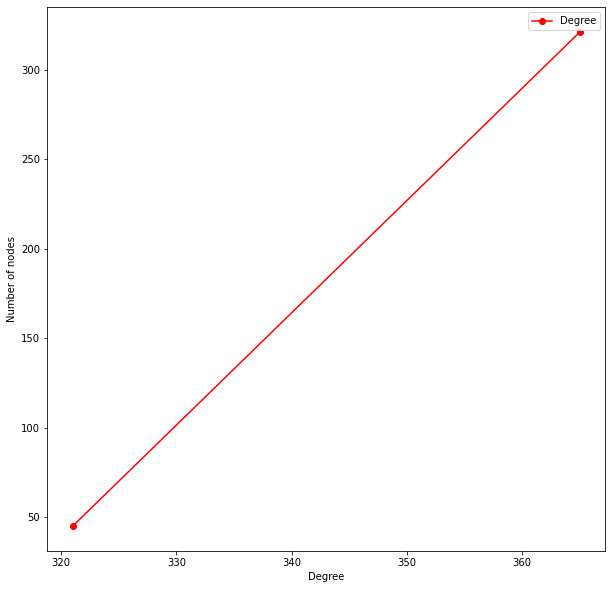

In [17]:
degree = dict(G_w2.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 10))
plt.plot(degree_values, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

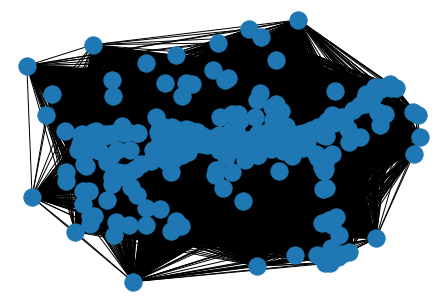

In [18]:
nx.draw(G_w2)

In [19]:
pr = nx.pagerank(G_w2)

In [20]:
pr

{'_general': 0.01916462855494472,
 '_random_talks': 0.0036510683610275507,
 'kaggle_crackers': 0.018491293955166126,
 'lang_r': 0.0173808587610939,
 '_meetings': 0.01855106768689426,
 'proj_dota2': 0.0015931431842375458,
 'lang_python': 0.018478498101845736,
 'lang_javascript': 0.0016090936381270553,
 'devops': 0.0020852196644073656,
 'visualization': 0.018414801313411222,
 'theory_and_practice': 0.018703207220355022,
 'deep_learning': 0.01880552059523921,
 '_jobs': 0.018791416740281938,
 'edu_courses': 0.018581665668234524,
 'gis': 0.0017604414909336708,
 'conference': 0.0021535243450653916,
 'nlp': 0.018150666822570223,
 'interesting_links': 0.01868074768808963,
 'deephack': 0.0017933207487344986,
 'network_analysis': 0.0018752282626369383,
 'big_data': 0.01729779643002541,
 '_random_politics': 0.0016998347560959316,
 'data_fest': 0.0024901956387156517,
 'ods_platform': 0.0015805855976449008,
 'z_bots': 0.0015422951201691534,
 'business': 0.0022651931619431125,
 '_meetings_spb': 0.00

In [21]:
pr_sorted = sorted(pr, key=pr.get, reverse=True)

In [22]:
pr_sorted

['_general',
 'mlcourse_ai_news',
 'deep_learning',
 '_jobs',
 'theory_and_practice',
 'interesting_links',
 'edu_courses',
 '_meetings',
 'kaggle_crackers',
 'lang_python',
 'datasets',
 'visualization',
 'welcome',
 'nlp',
 'mltrainings_live',
 'mltrainings_beginners',
 'lang_r',
 'big_data',
 'mlcourse_ai',
 '_top_jobs',
 '_top_science',
 '_top_talks',
 '_top_events',
 'mlcourse_ai_rus',
 'article_essence',
 'analytiсs',
 'career',
 '_random_talks',
 '_call_4_collaboration',
 'edu_books',
 '_jobs_hr',
 'looking_for_a_job',
 'gnomiki',
 'cv',
 'ods_resume_mastering',
 'class_cs231n',
 'hardware',
 'data_fest',
 'dlcourse_ai',
 'ml_pipeline',
 'class_dl_cmu',
 'reinforcement_learning',
 'ods_pet_projects',
 'business',
 'edu_academy',
 'ml4sg',
 'math',
 'trading',
 'recommender_systems',
 'ods_mentoring',
 'conference',
 'show_your_work',
 'sequences_series',
 'devops',
 '_meetings_spb',
 '_jobs_academy_phd',
 'bayesian',
 'edu_shad_exams',
 'coronavirus',
 'ods_sport',
 'audio_and_s

In [23]:
# channels by users
chF = channel_fullness('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [24]:
chF_sorted = sorted(chF, key=pr.get, reverse=True)

In [25]:
chF_sorted

['_general',
 'mlcourse_ai_news',
 'deep_learning',
 '_jobs',
 'theory_and_practice',
 'interesting_links',
 'edu_courses',
 '_meetings',
 'kaggle_crackers',
 'lang_python',
 'datasets',
 'visualization',
 'welcome',
 'nlp',
 'mltrainings_live',
 'mltrainings_beginners',
 'lang_r',
 'big_data',
 'mlcourse_ai',
 '_top_jobs',
 '_top_science',
 '_top_talks',
 '_top_events',
 'mlcourse_ai_rus',
 'article_essence',
 'analytiсs',
 'career',
 '_random_talks',
 '_call_4_collaboration',
 'edu_books',
 '_jobs_hr',
 'looking_for_a_job',
 'gnomiki',
 'cv',
 'ods_resume_mastering',
 'class_cs231n',
 'hardware',
 'data_fest',
 'dlcourse_ai',
 'ml_pipeline',
 'class_dl_cmu',
 'reinforcement_learning',
 'ods_pet_projects',
 'business',
 'edu_academy',
 'ml4sg',
 'math',
 'trading',
 'recommender_systems',
 'ods_mentoring',
 'conference',
 'show_your_work',
 'sequences_series',
 'devops',
 '_meetings_spb',
 '_jobs_academy_phd',
 'bayesian',
 'edu_shad_exams',
 'coronavirus',
 'ods_sport',
 'audio_and_s

In [26]:
import functools
functools.reduce(lambda x, y : x and y, map(lambda p, q: p == q, chF_sorted, pr_sorted), True)

True

## Number of unic event

In [27]:
path_ = 'data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020'
_s_set = set()

In [28]:
def unic_counter(path_, _s_set):
    """
    Return:
    
    _s_set: set of unic json strings in parsed data (without inside strings)
    
    count: number of unic files
    
    event: number of unic events
    
    ts: list of all time stamps (non unic)
    
    files: dict, where key is a day, values is set of channels with activity
    
    ch_bd: dict, distributions active channels by days
    """
    count = 0
    event = 0
    ts = []
    files = {}
    
    names = os.listdir(path_)
    s_path = os.path.realpath(path_)
    for name in names:
        fullpath = os.path.join(s_path, name)
        if os.path.isdir(fullpath):
            inside = os.listdir(fullpath)
            for i in inside:
                inpath = os.path.join(fullpath, i)
                if os.path.splitext(inpath)[1] == '.json':
                    
                    # add file to file list
                    try: 
                        files[i.split('.')[0]].add(name)
                    except KeyError:
                        files[i.split('.')[0]] = set()
                        files[i.split('.')[0]].add(name)                        
                 
                    with open(inpath, 'r') as file_open:
                        loaded = json.loads(file_open.read())
                        for i in loaded:
                            _s_set.update(i.keys())
                            if i['type'] == 'message':
                                event +=1
                                ts.append(i['ts'])
                        count += 1
    return _s_set, count, event, ts, files

In [29]:
s, count, event, ts, files = unic_counter(path_, _s_set)

In [30]:
s

{'attachments',
 'blocks',
 'bot_id',
 'bot_link',
 'bot_profile',
 'channel',
 'client_msg_id',
 'comment',
 'display_as_bot',
 'edited',
 'file',
 'files',
 'hidden',
 'icons',
 'inviter',
 'is_intro',
 'item',
 'item_type',
 'last_read',
 'latest_reply',
 'name',
 'new_broadcast',
 'no_notifications',
 'old_name',
 'parent_user_id',
 'permalink',
 'purpose',
 'reactions',
 'replies',
 'reply_count',
 'reply_users',
 'reply_users_count',
 'room',
 'root',
 'source_team',
 'subscribed',
 'subtype',
 'team',
 'text',
 'thread_ts',
 'topic',
 'ts',
 'type',
 'upload',
 'upload_reply_to',
 'user',
 'user_profile',
 'user_team',
 'username',
 'x_files'}

In [31]:
print('Number of files: {}, number of message events: {}'.format(count, event))

Number of files: 85424, number of message events: 1850209


Итого у нас:

- **366** каналов
- **54679** юзеров
- **1850209** событий, созданных юзерами в каналах

# Event distribution

In [32]:
len(ts)

1850209

In [33]:
ts[0]

'1565029341.016700'

In [34]:
import time
from datetime import datetime
time.time()

1612891815.9026072

In [35]:
datetime.fromtimestamp(time.time())

datetime.datetime(2021, 2, 9, 19, 30, 15, 907212)

In [36]:
datetime.fromtimestamp(float(ts[0]))

datetime.datetime(2019, 8, 5, 20, 22, 21, 16700)

In [37]:
dt = [datetime.fromtimestamp(float(i)) for i in ts]

In [38]:
import matplotlib.dates as mdates

In [39]:
mpl_dt = mdates.date2num(dt)

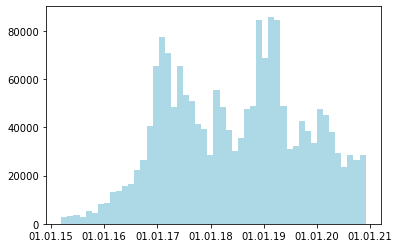

In [40]:
fig, ax = plt.subplots(1,1)
ax.hist(mpl_dt, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

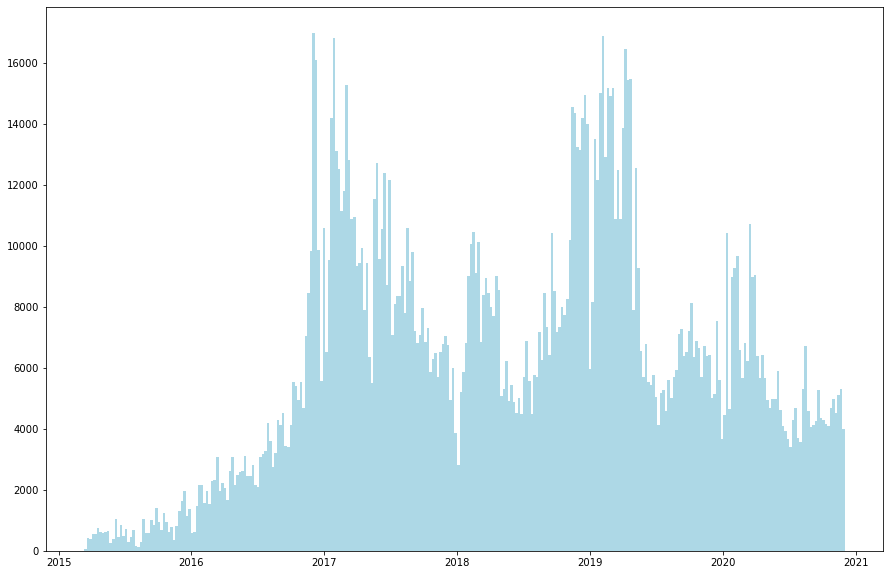

In [41]:
locator = mdates.AutoDateLocator()
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.hist(mpl_dt, bins=300, color='lightblue')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
plt.show()

# By day distribution

In [42]:
files

{'2019-08-05': {'_call_4_collaboration',
  '_jobs',
  '_meetings',
  '_meetings_ca',
  '_meetings_de',
  '_meetings_sf',
  '_meetings_siberia',
  '_meetings_spb',
  '_meetings_uk',
  '_meetings_ukraine',
  '_meetings_us',
  '_random_b',
  '_random_politics',
  '_random_talks',
  '_top_jobs',
  'big_data',
  'blockchain',
  'business',
  'career',
  'chess',
  'cv',
  'data_fest',
  'datasets',
  'deep_learning',
  'devops',
  'dlcourse_ai',
  'edu_academy',
  'edu_books',
  'edu_courses',
  'hardware',
  'interesting_links',
  'kaggle_crackers',
  'lang_python',
  'lang_r',
  'ml_pipeline',
  'mlcourse_ai',
  'mltrainings_beginners',
  'mltrainings_live',
  'nlp',
  'ods_habr',
  'ods_mentoring',
  'ods_sky_sport',
  'ods_sport',
  'ods_travel',
  'pr_jerk',
  'proj_kaggle_blindness',
  'proj_kaggle_champs',
  'proj_kaggle_fraud',
  'proj_kaggle_gan',
  'proj_kaggle_lanl',
  'proj_kaggle_protein',
  'proj_kaggle_salt',
  'proj_kaggle_severstal',
  'proj_nips_comp_19',
  'proj_punch_to_

In [43]:
import collections
files_sort = collections.OrderedDict(sorted(files.items()))
files_sort = [(datetime.strptime(i[0], '%Y-%m-%d'), len(i[1])) for i in files_sort.items()]
files_sort

[(datetime.datetime(2015, 3, 12, 0, 0), 2),
 (datetime.datetime(2015, 3, 15, 0, 0), 2),
 (datetime.datetime(2015, 3, 16, 0, 0), 2),
 (datetime.datetime(2015, 3, 17, 0, 0), 2),
 (datetime.datetime(2015, 3, 18, 0, 0), 2),
 (datetime.datetime(2015, 3, 19, 0, 0), 2),
 (datetime.datetime(2015, 3, 20, 0, 0), 2),
 (datetime.datetime(2015, 3, 21, 0, 0), 2),
 (datetime.datetime(2015, 3, 22, 0, 0), 5),
 (datetime.datetime(2015, 3, 23, 0, 0), 8),
 (datetime.datetime(2015, 3, 24, 0, 0), 2),
 (datetime.datetime(2015, 3, 25, 0, 0), 7),
 (datetime.datetime(2015, 3, 26, 0, 0), 6),
 (datetime.datetime(2015, 3, 27, 0, 0), 3),
 (datetime.datetime(2015, 3, 28, 0, 0), 7),
 (datetime.datetime(2015, 3, 29, 0, 0), 6),
 (datetime.datetime(2015, 3, 30, 0, 0), 5),
 (datetime.datetime(2015, 3, 31, 0, 0), 5),
 (datetime.datetime(2015, 4, 1, 0, 0), 11),
 (datetime.datetime(2015, 4, 2, 0, 0), 8),
 (datetime.datetime(2015, 4, 3, 0, 0), 7),
 (datetime.datetime(2015, 4, 4, 0, 0), 6),
 (datetime.datetime(2015, 4, 5, 0, 

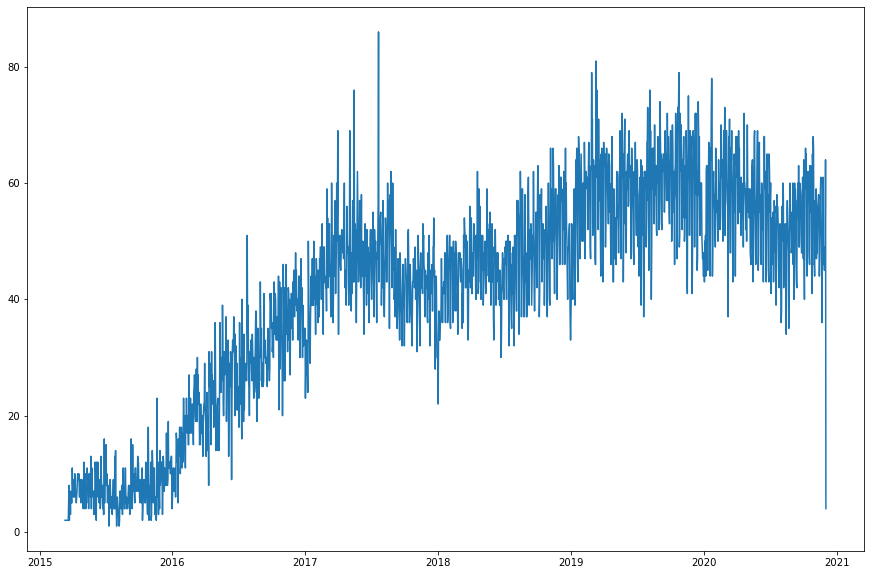

In [44]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(*zip(*files_sort))
plt.show()

# Temporal graph

In [45]:
def ts_builder(path_, list_of_channels, filename):
    
    dict_to_build = {}
    
    s_path = os.path.realpath(path_)

    for channel in list_of_channels:
        fullpath = os.path.join(s_path, channel, filename)
        with open(fullpath, 'r') as file_open:
            loaded = json.loads(file_open.read())
            
            for i in loaded:
                if i['type'] == 'message':
                    try:
                        try:
                            dict_to_build[i['user']].append((channel, i['ts']))
                        except KeyError:
                            dict_to_build[i['user']] = []
                            dict_to_build[i['user']].append((channel, i['ts']))
                    except KeyError:
                        continue
    return dict_to_build                      

In [46]:
dict_for_build = ts_builder('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020', files['2019-02-11'], '2019-02-11.json')

In [47]:
dict_for_build

{'U9GUF2PN2': [('chess', '1549883061.000700'),
  ('chess', '1549892690.001200'),
  ('datasets', '1549886681.009600'),
  ('reinforcement_learning', '1549874964.007100'),
  ('reinforcement_learning', '1549875040.007300'),
  ('reinforcement_learning', '1549882388.008600'),
  ('reinforcement_learning', '1549882771.008800')],
 'U0L4DGZU0': [('chess', '1549892442.000900'),
  ('chess', '1549892947.001400'),
  ('_meetings_kgd', '1549891223.001700'),
  ('_meetings_kgd', '1549904532.002900'),
  ('_meetings_kgd', '1549925240.003800'),
  ('_meetings_kgd', '1549925258.004000'),
  ('_random_b', '1549902006.332400'),
  ('_random_b', '1549903453.334700'),
  ('_random_b', '1549906763.355100'),
  ('data_fest', '1549883620.000500')],
 'UBA7N1YSG': [('chess', '1549913939.001600'),
  ('mlcourse_ai_news', '1549875087.009500')],
 'U053R9RS6': [('_call_4_collaboration', '1549884647.001300'),
  ('datasets', '1549894363.016700'),
  ('datasets', '1549894497.017000'),
  ('datasets', '1549894966.017500'),
  ('data

In [48]:
import pathpy as pp

In [49]:
def network_builder(dict_to_build):
    
    day_net = pp.TemporalNetwork()
    
    for i in dict_to_build.values():
        
        last = 0 
        for j, k in enumerate(i):            
          
            if j == 0:
                day_net.add_edge(k[0], k[0], datetime.fromtimestamp(float(k[1])).strftime('%Y-%m-%d %H:%M:%S'))
                last = k[0]
                print(k[0], k[0], datetime.fromtimestamp(float(k[1])).strftime('%Y-%m-%d %H:%M:%S'))
            else:
                day_net.add_edge(last, k[0], datetime.fromtimestamp(float(k[1])).strftime('%Y-%m-%d %H:%M:%S'))
                print(last, k[0], datetime.fromtimestamp(float(k[1])).strftime('%Y-%m-%d %H:%M:%S'))
    return day_net

In [50]:
day_net = network_builder(dict_for_build)

chess chess 2019-02-11 13:04:21
chess chess 2019-02-11 15:44:50
chess datasets 2019-02-11 14:04:41
chess reinforcement_learning 2019-02-11 10:49:24
chess reinforcement_learning 2019-02-11 10:50:40
chess reinforcement_learning 2019-02-11 12:53:08
chess reinforcement_learning 2019-02-11 12:59:31
chess chess 2019-02-11 15:40:42
chess chess 2019-02-11 15:49:07
chess _meetings_kgd 2019-02-11 15:20:23
chess _meetings_kgd 2019-02-11 19:02:12
chess _meetings_kgd 2019-02-12 00:47:20
chess _meetings_kgd 2019-02-12 00:47:38
chess _random_b 2019-02-11 18:20:06
chess _random_b 2019-02-11 18:44:13
chess _random_b 2019-02-11 19:39:23
chess data_fest 2019-02-11 13:13:40
chess chess 2019-02-11 21:38:59
chess mlcourse_ai_news 2019-02-11 10:51:27
_call_4_collaboration _call_4_collaboration 2019-02-11 13:30:47
_call_4_collaboration datasets 2019-02-11 16:12:43
_call_4_collaboration datasets 2019-02-11 16:14:57
_call_4_collaboration datasets 2019-02-11 16:22:46
_call_4_collaboration datasets 2019-02-12 08:

_random_b _random_b 2019-02-11 22:37:50
_random_b _random_b 2019-02-11 22:38:13
_random_b _random_b 2019-02-11 22:39:10
_random_b _random_b 2019-02-11 22:39:33
_random_b _random_b 2019-02-11 22:40:45
_random_b _random_b 2019-02-11 22:40:46
_random_b _random_b 2019-02-11 22:47:31
_random_b _random_b 2019-02-11 22:51:24
_random_b _random_b 2019-02-11 22:54:53
_random_b _random_b 2019-02-11 22:55:39
_random_b _random_b 2019-02-11 22:55:54
_random_b _random_b 2019-02-11 22:56:03
_random_b _random_b 2019-02-11 22:56:34
_random_b _random_b 2019-02-11 22:57:06
_random_b _random_b 2019-02-11 22:57:45
_random_b _random_b 2019-02-11 22:57:49
_random_b _random_b 2019-02-11 22:58:37
_random_b _random_b 2019-02-11 23:00:42
_random_b _random_b 2019-02-11 23:00:50
_random_b _random_b 2019-02-11 23:01:26
_random_b _random_b 2019-02-11 23:01:45
_random_b _random_b 2019-02-11 23:01:52
_random_b _random_b 2019-02-11 23:01:56
_random_b _random_b 2019-02-11 23:02:16
_random_b _random_b 2019-02-11 23:02:50


mlcourse_ai mlcourse_ai 2019-02-11 21:58:07
mlcourse_ai mlcourse_ai 2019-02-11 21:58:50
mlcourse_ai mlcourse_ai 2019-02-11 22:07:53
mlcourse_ai mlcourse_ai 2019-02-11 22:09:40
mlcourse_ai mlcourse_ai 2019-02-11 22:13:58
mlcourse_ai mlcourse_ai 2019-02-11 22:32:26
mlcourse_ai mlcourse_ai 2019-02-12 09:36:56
mlcourse_ai mlcourse_ai 2019-02-12 09:40:40
mlcourse_ai mlcourse_ai_news 2019-02-11 21:46:43
mlcourse_ai mlcourse_ai 2019-02-11 13:38:20
mlcourse_ai mlcourse_ai 2019-02-11 13:39:08
mlcourse_ai mlcourse_ai 2019-02-11 13:42:14
mlcourse_ai mlcourse_ai 2019-02-11 13:52:38
mlcourse_ai mlcourse_ai 2019-02-11 14:08:07
mlcourse_ai mlcourse_ai 2019-02-11 15:39:57
mlcourse_ai mlcourse_ai_news 2019-02-11 15:37:59
mlcourse_ai mlcourse_ai_news 2019-02-11 16:19:43
mlcourse_ai mlcourse_ai 2019-02-11 13:44:19
mlcourse_ai mlcourse_ai 2019-02-11 13:48:48
mlcourse_ai mlcourse_ai 2019-02-11 15:05:29
mlcourse_ai mlcourse_ai 2019-02-11 17:19:07
mlcourse_ai mlcourse_ai 2019-02-11 17:24:27
mlcourse_ai mlcou

theory_and_practice theory_and_practice 2019-02-11 12:50:02
theory_and_practice theory_and_practice 2019-02-11 13:05:46
theory_and_practice theory_and_practice 2019-02-11 13:28:07
theory_and_practice theory_and_practice 2019-02-11 13:36:19
theory_and_practice theory_and_practice 2019-02-11 15:07:19
theory_and_practice theory_and_practice 2019-02-11 13:34:47
theory_and_practice theory_and_practice 2019-02-11 16:51:54
theory_and_practice theory_and_practice 2019-02-11 17:05:04
theory_and_practice theory_and_practice 2019-02-11 15:03:37
theory_and_practice theory_and_practice 2019-02-11 15:48:20
theory_and_practice theory_and_practice 2019-02-11 16:03:00
theory_and_practice theory_and_practice 2019-02-11 16:25:25
theory_and_practice theory_and_practice 2019-02-11 16:34:42
theory_and_practice theory_and_practice 2019-02-11 15:07:11
theory_and_practice theory_and_practice 2019-02-11 15:52:51
theory_and_practice theory_and_practice 2019-02-11 15:55:53
theory_and_practice theory_and_practice 

In [51]:
print(day_net)

Nodes:			61
Time-stamped links:	3115
Links/Nodes:		51.0655737704918
Observation period:	[1549872000, 1549958351]
Observation length:	 86351 
Time stamps:		 3039 
Avg. inter-event dt:	 28.42363396971692
Min/Max inter-event dt:	 1/1838


In [52]:
style = {    
  'ts_per_frame': 50, 
  'ms_per_frame': 50,
  'look_ahead': 20, 
  'look_behind': 20, 
  'node_size': 9, 
  'inactive_edge_width': 2,
  'active_edge_width': 8, 
  'label_color' : '#000000',
  'label_size' : '25px',
  'label_offset': [0,5],
    'height': 1200,
    'width': 1200,
  }

In [134]:
pp.visualisation.plot(day_net, **style)

#### visualisation

In [96]:
pp.visualisation.export_html(day_net, 'static/day_net.html', **style)

In [53]:
help(pp.visualisation.plot)

Help on function plot in module pathpy.visualisation.html:

plot(network, **params)
    Plots an interactive visualisation of pathpy objects
    in a jupyter notebook. This generic function supports instances of
    pathpy.Network, pathpy.TemporalNetwork, pathpy.HigherOrderNetwork,
    pathpy.MultiOrderModel, and pathpy.Paths. See description of different
    visualisations in the parameter description.
    
    Parameters
    ----------
    network: Network, TemporalNetwork, HigherOrderNetwork, MultiOrderModel, Paths
        The object to visualize. Depending on the type of the object passed, the following
        visualisations are generated:
            Network: interactive visualisation of a network with a force-directed layout.
            HigherOrderNetwork: interactive visualisation of the first-order network
                with forces calculated based on the higher-order network. By setting
                plot_higher_order_nodes=True a network with unprojected
               

#### static variant

In [54]:
def network_builder_static(dict_to_build):
    
    day_net_stat = nx.Graph()
    
    for i in dict_to_build.values():
        
        last = 0 
        for j, k in enumerate(i):            
          
            if j == 0:
                day_net_stat.add_edge(k[0], k[0])
                last = k[0]
                print(k[0], k[0])
            else:
                day_net_stat.add_edge(last, k[0])
                print(last, k[0])
    return day_net_stat

In [55]:
day_net_stat = network_builder_static(dict_for_build)

chess chess
chess chess
chess datasets
chess reinforcement_learning
chess reinforcement_learning
chess reinforcement_learning
chess reinforcement_learning
chess chess
chess chess
chess _meetings_kgd
chess _meetings_kgd
chess _meetings_kgd
chess _meetings_kgd
chess _random_b
chess _random_b
chess _random_b
chess data_fest
chess chess
chess mlcourse_ai_news
_call_4_collaboration _call_4_collaboration
_call_4_collaboration datasets
_call_4_collaboration datasets
_call_4_collaboration datasets
_call_4_collaboration datasets
_call_4_collaboration _call_4_collaboration
_call_4_collaboration _call_4_collaboration
deep_learning deep_learning
deep_learning deep_learning
deep_learning deep_learning
deep_learning deep_learning
deep_learning deep_learning
deep_learning deep_learning
deep_learning deep_learning
deep_learning deep_learning
deep_learning deep_learning
deep_learning hardware
deep_learning deep_learning
deep_learning deep_learning
deep_learning ml_pipeline
deep_learning ml_pipeline
dee

_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b


nlp nlp
nlp nlp
nlp nlp
nlp nlp
nlp nlp
nlp nlp
nlp nlp
nlp nlp
nlp nlp
nlp nlp
nlp nlp
nlp nlp
nlp nlp
nlp nlp
nlp nlp
nlp nlp
nlp nlp
nlp nlp
lang_r lang_r
lang_r lang_r
lang_r lang_r
lang_r lang_r
lang_r lang_r
lang_r lang_r
proj_msft_malware proj_msft_malware
proj_msft_malware theory_and_practice
proj_msft_malware mlcourse_ai_news
proj_msft_malware mlcourse_ai_news
_jobs _jobs
_jobs _jobs
_jobs _jobs
_jobs _jobs
_jobs _jobs
_jobs _jobs
_jobs _jobs
_jobs _jobs
_jobs _jobs
_jobs _jobs
_jobs _jobs
satellite_imaging satellite_imaging
satellite_imaging satellite_imaging
satellite_imaging proj_kaggle_elo_merch
satellite_imaging satellite_imaging
_meetings_siberia _meetings_siberia
_meetings_siberia _meetings_siberia
ods_habr ods_habr
ods_habr ods_habr
ods_habr theory_and_practice
ods_habr cv
ods_habr cv
ods_habr cv
ods_habr ods_habr
ods_habr ods_habr
ods_habr ods_habr
ods_habr interesting_links
ods_habr interesting_links
ods_habr cv
mlcourse_ai mlcourse_ai
mlcourse_ai mlcourse_ai
mlcours

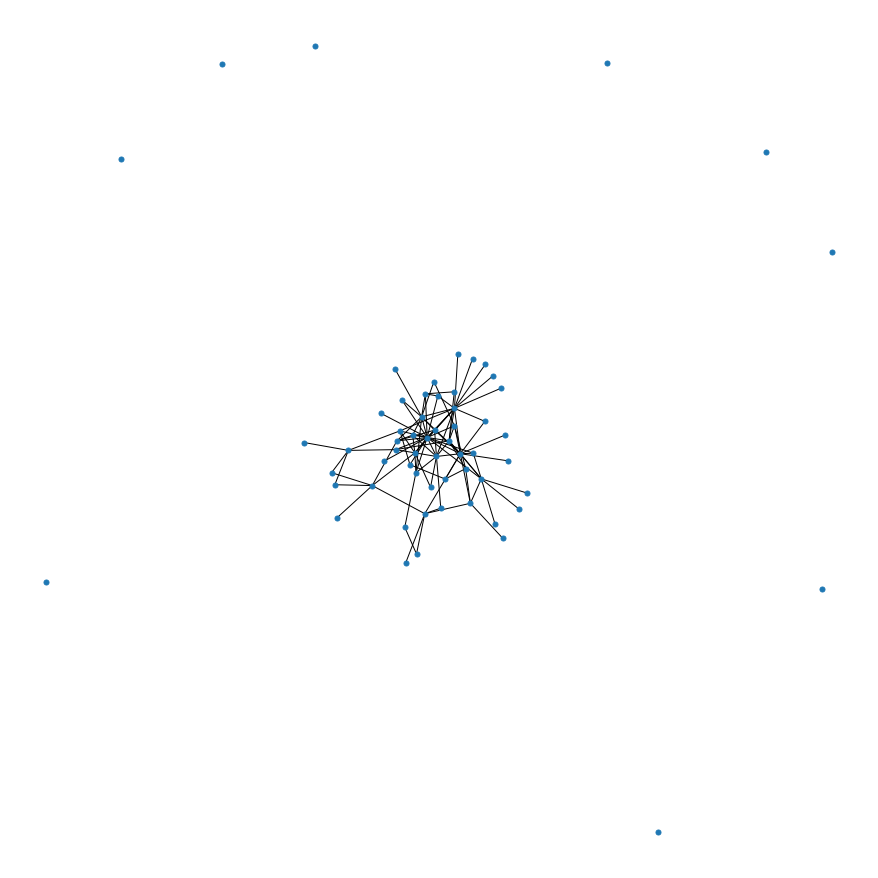

In [56]:
plt.figure(1, figsize=(12,12))
nx.draw(day_net_stat, node_size=25)
plt.show()

In [75]:
plt.savefig('static/day_net_static.png')

<Figure size 432x288 with 0 Axes>

# user to user message passing

In [74]:
def ts_builder_u_to_u(path_, list_of_channels, filename):
    
    list_to_build = []
    
    s_path = os.path.realpath(path_)

    for channel in list_of_channels:
        fullpath = os.path.join(s_path, channel, filename)
        with open(fullpath, 'r') as file_open:
            loaded = json.loads(file_open.read())
            
            for i in loaded:
                if i['type'] == 'message':
                    try:
                        list_to_build.append((i['ts'], i['user'], channel))
                    except KeyError:
                        continue
    return list_to_build    

In [75]:
dict_for_build_u_to_u = ts_builder_u_to_u('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020', files['2019-02-11'], '2019-02-11.json')

In [76]:
dict_for_build_u_to_u

[('1549883061.000700', 'U9GUF2PN2', 'chess'),
 ('1549892442.000900', 'U0L4DGZU0', 'chess'),
 ('1549892690.001200', 'U9GUF2PN2', 'chess'),
 ('1549892947.001400', 'U0L4DGZU0', 'chess'),
 ('1549913939.001600', 'UBA7N1YSG', 'chess'),
 ('1549884647.001300', 'U053R9RS6', '_call_4_collaboration'),
 ('1549887021.001500', 'U45603VGE', '_call_4_collaboration'),
 ('1549897017.002100', 'UDHLX7UK0', '_call_4_collaboration'),
 ('1549872870.004000', 'U43FTJQ2V', 'deep_learning'),
 ('1549873496.006500', 'U7FGEF2KT', 'deep_learning'),
 ('1549873681.007700', 'U62N1NJUC', 'deep_learning'),
 ('1549874211.008300', 'UFRSY9GNN', 'deep_learning'),
 ('1549874448.008600', 'U82TRLBJ6', 'deep_learning'),
 ('1549874505.008800', 'U8VPP4L5V', 'deep_learning'),
 ('1549874688.009300', 'U90B3UTFY', 'deep_learning'),
 ('1549876050.009900', 'U62N1NJUC', 'deep_learning'),
 ('1549876106.010400', 'U90B3UTFY', 'deep_learning'),
 ('1549877416.010900', 'U0A8KNDC6', 'deep_learning'),
 ('1549877695.011100', 'U62N1NJUC', 'deep_le

In [113]:
def user_to_user_network_builder(dict_to_build_u_to_u):
    
    """Passing message when user make post
    1. add user id and ts to set, labeled by channel's name
    2. if user is make post, look for previous posts in that channels
    3. if we seen new posts -> pass message from post owners to user at current ts
    4. add user id and ts to set, labeled by user's name    
    """
    
    day_net = pp.TemporalNetwork()
    channels = {}
    users = {}
    
    for i in dict_to_build_u_to_u:
        
        if i[2] in channels.keys():
            
            if i[1] in users.keys(): 
         
                diff = channels[i[2]].difference(users[i[1]])

                for j in diff:

                    day_net.add_edge(j[1], i[1], datetime.fromtimestamp(float(i[0])).strftime('%Y-%m-%d %H:%M:%S'))

                    users[i[1]].add(j)
                    
            else:
                users[i[1]] = set()
                users[i[1]].add((i[1], i[0]))
        
            channels[i[2]].add((i[1], i[0]))

        else: 
    
            channels[i[2]] = set()
            channels[i[2]].add((i[1], i[0]))
        
    return day_net

In [109]:
day_net_u_to_u = user_to_user_network_builder(dict_for_build_u_to_u)

In [110]:
print(day_net_u_to_u)

Nodes:			3316
Time-stamped links:	93154
Links/Nodes:		28.092279855247288
Observation period:	[1549872167, 1549958351]
Observation length:	 86184 
Time stamps:		 2284 
Avg. inter-event dt:	 37.7503285151117
Min/Max inter-event dt:	 1/4135


In [111]:
style = {    
  'ts_per_frame': 50, 
  'ms_per_frame': 50,
  'node_size': 5, 
  'inactive_edge_width': 0.0,
  'active_edge_width': 0.1, 
  'label_color' : '#000000',
  'label_size' : '0'
  }

In [112]:
pp.visualisation.export_html(day_net_u_to_u, 'static/day_net_u_to_u.html', **style)